In [1]:
import numpy as np
import urllib
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import random
import cv2
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
from matplotlib.colors import hsv_to_rgb
import pandas as pd
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [22]:
#We could adjust those number up to 960
orange_link = "https://images.squarespace-cdn.com/content/v1/5a98653d96e76f7f7dc569c7/1652203191222-16N8MP7K7EACDQ1EVJ7E/shot_orange_marilyn_1964-19604.png?format=960w"
red_link = "https://images.squarespace-cdn.com/content/v1/5a98653d96e76f7f7dc569c7/1652203192094-MIQYNYEIJYJBY957F7T7/shot_red_marilyn_1964-19604.png?format=960w"
turq_link = "https://images.squarespace-cdn.com/content/v1/5a98653d96e76f7f7dc569c7/1652213792503-2Q9A294S9UOFEBQZQQNP/shot_turq_marilyn_1964-19604.png?format=960w"
blue_link = "https://images.squarespace-cdn.com/content/v1/5a98653d96e76f7f7dc569c7/1652203207667-AHQD95AZ4Z1MCZ5B4C0N/shot_blue_marilyn_1964-19604.png?format=960w"
eggblue_link = "https://images.squarespace-cdn.com/content/v1/5a98653d96e76f7f7dc569c7/1652203189304-UFR2YYN9605G0IW13YHJ/shot_eggblue_marilyn_1964-19604.png?format=960w"

In [65]:
def find_color_range(image):
    # Convert the image to the HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the minimum and maximum values for each channel (H, S, V)
    h_min, s_min, v_min = np.min(hsv_image, axis=(0, 1))
    h_max, s_max, v_max = np.max(hsv_image, axis=(0, 1))

    return (h_min, s_min, v_min), (h_max, s_max, v_max)

In [24]:
def convert_to_numerical_tuple(tup):
    numerical_tuple = tuple(float(item) for item in tup)
    return numerical_tuple

#color_range_min = convert_to_numerical_tuple(color_range_min)
#color_range_max = convert_to_numerical_tuple(color_range_max)

## Orange Face

In [25]:
req = urllib.request.urlopen(orange_link)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img_orange = cv2.imdecode(arr, -1) # 'Load it as it is'

(960, 960, 4)


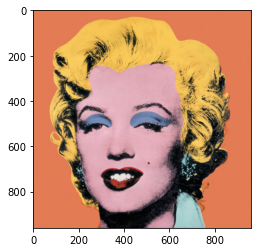

In [26]:
# Convert image to matrix
image_matrix_orange = np.array(img_orange)
# Display the shape of the matrix
print(image_matrix_orange.shape)
img_orange = cv2.cvtColor(img_orange, cv2.COLOR_BGR2RGB)
plt.imshow(img_orange)
plt.show()

In [41]:
#convert imgage to hsv type
hsv_img_orange = cv2.cvtColor(img_orange, cv2.COLOR_RGB2HSV)

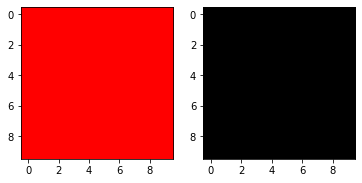

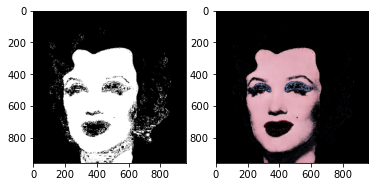

In [42]:
#define range for background orange
light = (110, 40, 0)
dark = (255, 255, 255)
lo_square = np.full((10, 10, 3), light, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark, dtype=np.uint8) / 255.0
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

#get selected region
mask = cv2.inRange(hsv_img_orange, light, dark)
background = cv2.bitwise_and(img_orange, img_orange, mask=mask)
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(background)
plt.show()

## Red Face

In [43]:
req = urllib.request.urlopen(red_link)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img_red = cv2.imdecode(arr, -1) # 'Load it as it is'

(960, 960, 4)


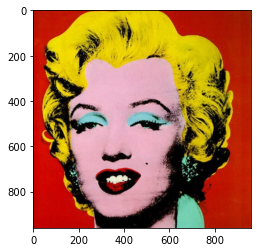

In [44]:
# Convert image to matrix
image_matrix_red = np.array(img_red)
# Display the shape of the matrix
print(image_matrix_red.shape)
img_red = cv2.cvtColor(img_red, cv2.COLOR_BGR2RGB)
plt.imshow(img_red)
plt.show()

In [45]:
#convert imgage to hsv type
hsv_img_red = cv2.cvtColor(img_red, cv2.COLOR_RGB2HSV)

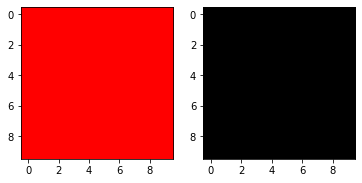

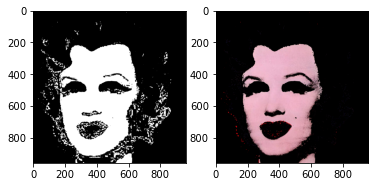

In [46]:
#define range for face
light = (110, 40, 0)
dark = (255, 255, 255)
lo_square = np.full((10, 10, 3), light, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark, dtype=np.uint8) / 255.0
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

#get selected region
mask = cv2.inRange(hsv_img_red, light, dark)
background2 = cv2.bitwise_and(img_red, img_red, mask=mask)
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(background2)
plt.show()

## Turq Face

In [58]:
req = urllib.request.urlopen(turq_link)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img_turq = cv2.imdecode(arr, -1) # 'Load it as it is'

(960, 960, 4)


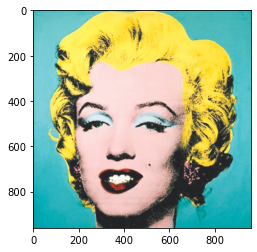

In [60]:
# Convert image to matrix
image_matrix_turq = np.array(img_turq)
# Display the shape of the matrix
print(image_matrix_turq.shape)
img_turq = cv2.cvtColor(img_turq, cv2.COLOR_BGR2RGB)
plt.imshow(img_turq)
plt.show()

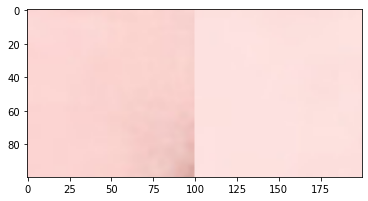

In [94]:
# Define the coordinates of the region of interest (ROI)

x1, x2 = 490, 590
y1, y2 = 550, 650


x3, x4 = 300, 400
y3, y4 = 300, 400



# Crop the image
cropped_image = img_turq[y1:y2, x1:x2]
cropped_image2= img_turq[y3:y4, x3:x4]

#merge picture
im_h = cv2.hconcat([cropped_image, cropped_image2])
plt.imshow(im_h)
plt.show()

In [95]:
find_color_range(im_h)

((0, 26, 215), (179, 64, 255))

In [62]:
#convert imgage to hsv type
hsv_img_turq = cv2.cvtColor(img_turq, cv2.COLOR_RGB2HSV)

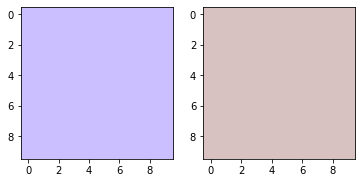

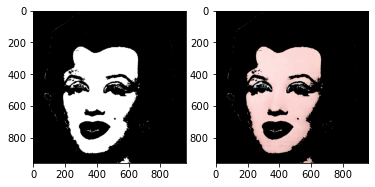

In [96]:
#define range for face
light = (0, 26, 215)
dark = (179, 64, 255)
lo_square = np.full((10, 10, 3), light, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark, dtype=np.uint8) / 255.0
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

#get selected region
mask = cv2.inRange(hsv_img_turq, light, dark)
background = cv2.bitwise_and(img_turq, img_turq, mask=mask)
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(background)
plt.show()

## Blue Face

In [47]:
req = urllib.request.urlopen(blue_link)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img_blue = cv2.imdecode(arr, -1) # 'Load it as it is'

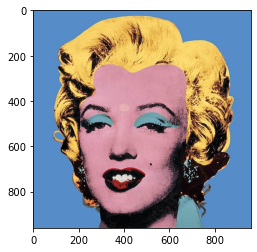

In [48]:
# Convert image to matrix
image_matrix_blue = np.array(img_blue)
img_blue = cv2.cvtColor(img_blue, cv2.COLOR_BGR2RGB)
plt.imshow(img_blue)
plt.show()

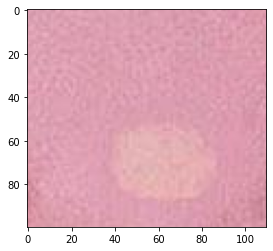

In [49]:
# Define the coordinates of the region of interest (ROI)
x1, x2 = 340, 450 
y1, y2 = 360,  460


# Crop the image
cropped_image = img_blue[y1:y2, x1:x2] 
#cropped_image2 = img[y3:y4, x3:x4]


#im_h = cv2.hconcat([cropped_image, cropped_image2])
plt.imshow(cropped_image)
plt.show()

In [50]:
# Load the image
image = cropped_image
# Find the color range in the image
color_range_min, color_range_max = find_color_range(image)

# Print the minimum and maximum values for each channel
h_min, s_min, v_min = color_range_min
h_max, s_max, v_max = color_range_max
print(f"Color Range (Min): H={h_min}, S={s_min}, V={v_min}")
print(f"Color Range (Max): H={h_max}, S={s_max}, V={v_max}")

Color Range (Min): H=0, S=50, V=192
Color Range (Max): H=179, S=90, V=242


In [51]:
# Find the color range in the image
color_range_min, color_range_max = find_color_range(image)
color_range_min = convert_to_numerical_tuple(color_range_min)
color_range_max = convert_to_numerical_tuple(color_range_max)

In [52]:
#convert imgage to hsv type
hsv_img_blue = cv2.cvtColor(img_blue, cv2.COLOR_RGB2HSV)

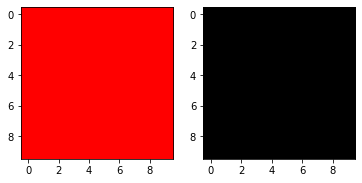

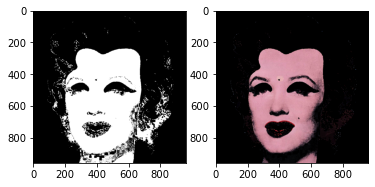

In [53]:
#define range for background orange
light_orange = (110, 40, 0)
dark_orange = (255, 255, 255)
lo_square = np.full((10, 10, 3), light_orange, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_orange, dtype=np.uint8) / 255.0
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

#get selected region
mask = cv2.inRange(hsv_img_blue, light_orange, dark_orange)
background = cv2.bitwise_and(img_blue, img_blue, mask=mask)
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(background)
plt.show()

## Eggblue Face

In [97]:
req = urllib.request.urlopen(eggblue_link)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img_eggblue = cv2.imdecode(arr, -1) # 'Load it as it is'

(960, 960, 4)


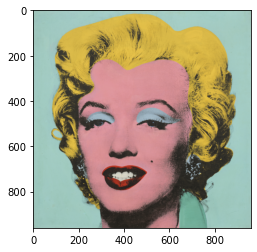

In [98]:
# Convert image to matrix
image_matrix_eggblue = np.array(img_eggblue)
# Display the shape of the matrix
print(image_matrix_turq.shape)
img_eggblue = cv2.cvtColor(img_eggblue, cv2.COLOR_BGR2RGB)
plt.imshow(img_eggblue)
plt.show()

In [99]:
#convert imgage to hsv type
hsv_img_eggblue = cv2.cvtColor(img_eggblue, cv2.COLOR_RGB2HSV)

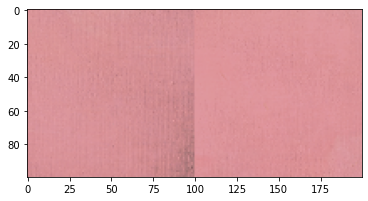

In [110]:
# Define the coordinates of the region of interest (ROI)

x1, x2 = 490, 590
y1, y2 = 550, 650


x3, x4 = 350, 450
y3, y4 = 300, 400



# Crop the image
cropped_image = img_eggblue[y1:y2, x1:x2]
cropped_image2= img_eggblue[y3:y4, x3:x4]

merge picture
im_h = cv2.hconcat([cropped_image, cropped_image2])
plt.imshow(im_h)
plt.show()

In [128]:
find_color_range(cropped_image)

((0, 72, 133), (179, 93, 231))

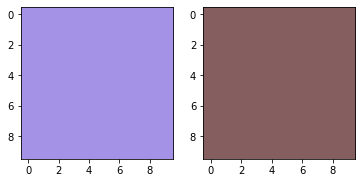

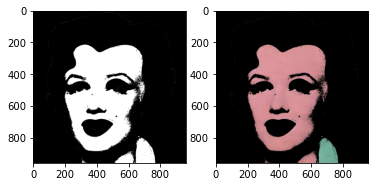

In [129]:
#define range for background orange
light = (0, 72, 133)
dark = (179, 93, 230)
lo_square = np.full((10, 10, 3), light, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark, dtype=np.uint8) / 255.0
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

#get selected region
mask = cv2.inRange(hsv_img_eggblue, light, dark)
background = cv2.bitwise_and(img_eggblue, img_eggblue, mask=mask)
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(background)
plt.show()

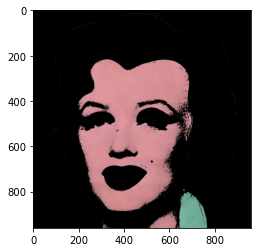

In [132]:
plt.imshow(background)
plt.show()

In [136]:
#convert imgage to hsv type
hsv_img_eggblue = cv2.cvtColor(background, cv2.COLOR_RGB2HSV)

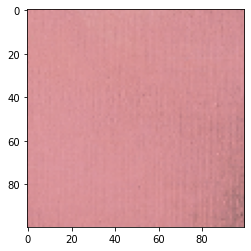

In [133]:
# Define the coordinates of the region of interest (ROI)

x1, x2 = 490, 590
y1, y2 = 550, 650



# Crop the image
cropped_image = img_eggblue[y1:y2, x1:x2]

plt.imshow(cropped_image)
plt.show()

In [134]:
find_color_range(cropped_image)

((0, 72, 133), (179, 93, 231))

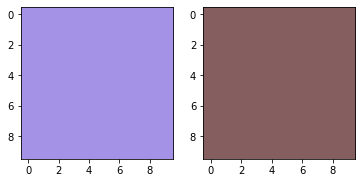

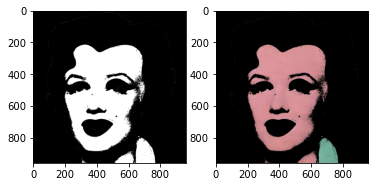

In [137]:
#define range for background orange
light = (0, 72, 133)
dark = (179, 93, 230)
lo_square = np.full((10, 10, 3), light, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark, dtype=np.uint8) / 255.0
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

#get selected region
mask = cv2.inRange(hsv_img_eggblue, light, dark)
background2 = cv2.bitwise_and(background, background, mask=mask)
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(background2)
plt.show()

# Gun Shot (Blue Image)

In [303]:
req = urllib.request.urlopen(blue_link)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img_blue = cv2.imdecode(arr, -1) # 'Load it as it is'

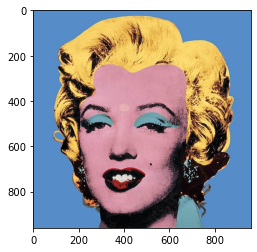

In [304]:
# Convert image to matrix
image_matrix_blue = np.array(img_blue)
img_blue = cv2.cvtColor(img_blue, cv2.COLOR_BGR2RGB)
plt.imshow(img_blue)
plt.show()

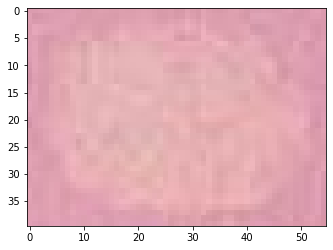

In [305]:
# get the gun shot area
x1, x2 = 375, 430 
y1, y2 = 410,  450

# Crop the image
cropped_image = img_blue[y1:y2, x1:x2] 
#cropped_image2 = img[y3:y4, x3:x4]


#im_h = cv2.hconcat([cropped_image, cropped_image2])
plt.imshow(cropped_image)
plt.show()

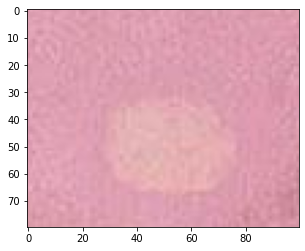

In [306]:
# get the gun shot area
x1, x2 = 350, 450 
y1, y2 = 380, 460

# Crop the image
cropped_image = img_blue[y1:y2, x1:x2] 
#cropped_image2 = img[y3:y4, x3:x4]


#im_h = cv2.hconcat([cropped_image, cropped_image2])
plt.imshow(cropped_image)
plt.show()

In [307]:
# Extract the Red, Green, and Blue channels from the specific area
specific_area = cropped_image
red_channel = specific_area[:, :, 0].flatten()
green_channel = specific_area[:, :, 1].flatten()
blue_channel = specific_area[:, :, 2].flatten()

# Randomly sample RGB values with the same distribution as the specific area for each color channel
sampled_red = np.random.choice(red_channel, size=(40, 55))
sampled_green = np.random.choice(green_channel, size=(40, 55))
sampled_blue = np.random.choice(blue_channel, size=(40, 55))

# Create a new matrix with the sampled RGB values
new_matrix = np.dstack((sampled_red, sampled_green, sampled_blue)).astype(np.uint8)


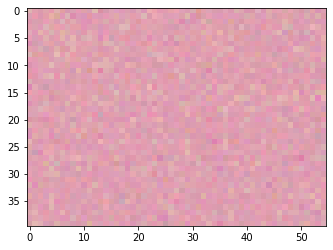

In [308]:
plt.imshow(new_matrix)
plt.show()

In [309]:
new_img_blue = img_blue.copy()
# ROI of gun shot area
x1, x2 = 375, 430 
y1, y2 = 410,  450

# Replace the area in new_img_blue with new_matrix
new_img_blue[y1:y2, x1:x2] = new_matrix

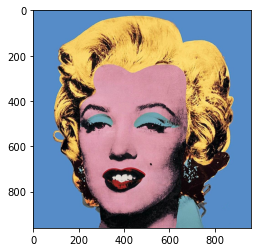

In [310]:
plt.imshow(new_img_blue)
plt.show()